In [ ]:
## 제6절 군집분석
# 군집분석은 각 객체의 유사성을 측정하여 유사성이 높은 대상집단을 분류하는 통계적 기법이다.
# 해당 기법은 컴퓨터의 발전이 있기 전에는 계산의 양이 다소 많아 활발하지 않았지만, 최근 연구되고 있음

# 군집에 속한 객체들의 유사성과 서로 다른 군집에 속한 객체 간의 상이성을 규명하는 분석이며
# 종속변수(반응변수)가 필요가 없기에 비지도학습으로 분류된다.
# 이상값의 탐지 등에도 사용되고 있음.

In [ ]:
## 1. 계층적 군집분석
# 최단 연결법 : 거리행렬에서 거리가 가장 가까운 데이터를 묶어서 군집을 형성한다.
# 최장 연결법 : 데이터와의 거리를 계산할 때 최장거리를 거리로 계산한다.
# 평균 연결법 : 데이터와의 거리를 계산할 때 평균을 거리로 계산한다.
# 중심 연결법 : 두 군집의 거리를 두 군집의 중심 간 거리로 계산.
# 와드 연결법 : 각 데이터의 거리보다는 군집 내 편차들의 제곱합에 근거를 두고 군집화함
#  데이터의 크기가 너무 크지 않다면 주로 와드 연결법을 사용한다. 군집 내 편차는 작고 
#  군집 간 편차는 크게 군집화를 시키는 것이 정보의 손실(SSE)를 최소화시킬 수 있다.
#  이러한 와드연결법은 상대적으로 계산량이 많은 단점이 있지만 군집 크기를 비슷하게 만들며 해석력이 좋다는 장점이 있다.

In [1]:
import pandas as pd
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from matplotlib import pyplot as plt

US = pd.read_csv('C:/adp/data/USArrests.csv')

US.columns = ['State', 'Murder', 'Assault', 'UrbanPop', 'Rape']
labelList=US.State.tolist()
US.head()


,State,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


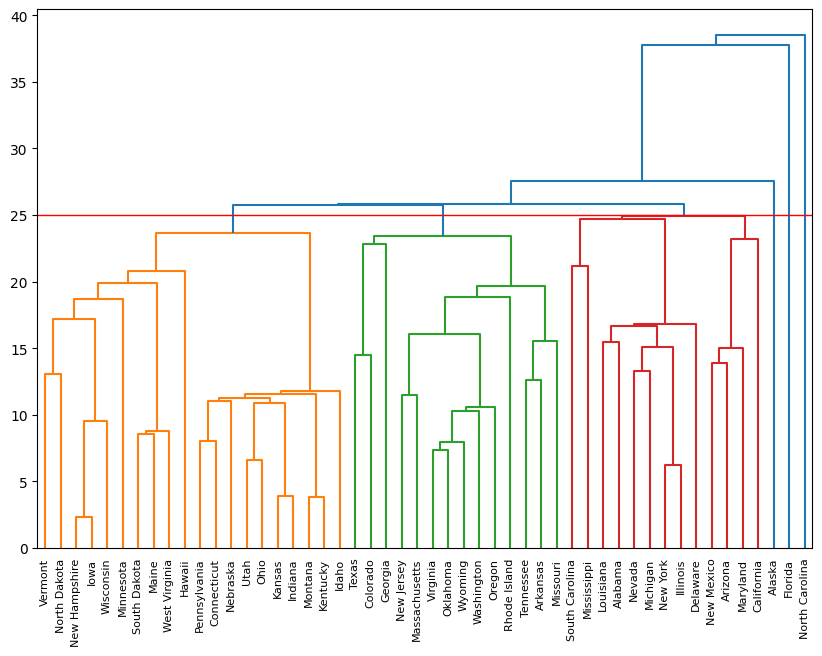

In [2]:
# 최단연결법
single = linkage(US.iloc[:, 1::], metric ='euclidean', method='single')

# 덴드로그램 그리기
plt.figure(figsize=(10, 7))
dendrogram(single,
            orientation='top',
            labels=labelList,
            distance_sort='descending',
            color_threshold=25,   #군집의 수를 설정하는 Height 값 설정
            show_leaf_counts=True)

plt.axhline(y=25, color='r', linewidth=1)  #Height 값에 따라 선을 그어 적절한 군집 수 설정
plt.show()


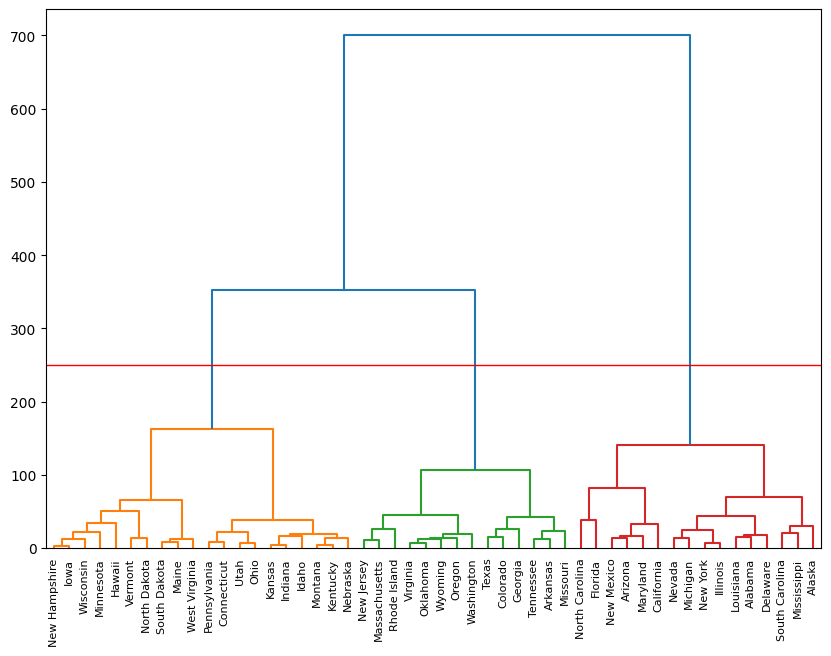

In [3]:
# 와드연결법
ward = linkage(US.iloc[:, 1::], metric ='euclidean', method='ward')
# 덴드로그램 그리기
plt.figure(figsize=(10, 7))
dendrogram(ward,
            orientation='top',
            labels=labelList,
            distance_sort='descending',
            color_threshold=250,
            show_leaf_counts=True)
plt.axhline(y=250, color='r', linewidth=1)  #Height 값에 따라 선을 그어 적절한 군집 수 설정
plt.show()


In [4]:
# state마다 어떤 군집에 설정되었는지 확인
assignments = fcluster(ward, 250, 'distance')
assignments


array([1, 1, 1, 2, 1, 2, 3, 1, 1, 2, 3, 3, 1, 3, 3, 3, 3, 1, 3, 1, 2, 1,
       3, 1, 2, 3, 3, 1, 3, 2, 1, 1, 1, 3, 3, 2, 2, 3, 2, 1, 3, 2, 2, 3,
       3, 2, 2, 3, 3, 2], dtype=int32)

In [5]:
US['cluster'] = assignments
US.groupby('cluster').mean()

,Murder,Assault,UrbanPop,Rape
cluster,,,,
1,11.812500,272.562500,68.312500,28.375000
2,8.214286,173.285714,70.642857,22.842857
3,4.270000,87.550000,59.750000,14.390000


In [ ]:
## 2. 비계층적 군집분석
# 랜덤하게 군집을 묶어가는 알고리즘이 사용된다.
- 특징
 . 알고리즘이 쉽고 간결하다.
 . 변수가 많을 경우 군집화의 정확도가 떨어진다. 이때에는 차원 축소(PCA)를 고려해야 한다.
 . 군집의 수 K를 스스로 판단하여 알고리즘에 적용시켜야 한다. 

In [ ]:
# ㅁ 최적의 군집 개수를 판단하는 방법
#  - 콜린스키 하라바츠 스코어 방법
#   . 모든 클러스터에 대한 클러스터 간 분산과 클러스터 내 분산의 합의 비율이다.
#   . 점수가 높을수록 성능이 좋다.
#  - 엘보우 방법
#   . 클러스터 내 오차제곱합을 클러스터 개수마다 비교하는 방법
#   . 반복문을 통해 클러스터 개수를 늘려가면서 계산한 SSE 값을 비교한다.
#   . 어느 순간 SSE가 급격히 줄어드는 부분, 
#     기울기가 소실되는 구간을 elbow로 판단하고 그 순간을 최적의 클러스터 개수로 판단한다.

In [8]:
# 필요한 모듈
import pandas as pd 
from sklearn.cluster import KMeans
# 데이터 로드
iris = pd.read_csv('C:/adp/data/iris.csv')
X = iris.drop('target',axis=1)
X.tail()

,sepal length,sepal width,petal length,petal width
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3
149,5.9,3.0,5.1,1.8


In [11]:
# 클러스터별 콜린스키 하라바츠 결과 비교
from sklearn.metrics import calinski_harabasz_score

for k in range(2, 10):
    kmeans_model = KMeans(n_clusters=k, random_state=1).fit(X)
    labels = kmeans_model.labels_
    print(k, ":", calinski_harabasz_score(X, labels))

2 : 513.3038433517568
3 : 560.3999242466402
4 : 529.1207190840455
5 : 494.0943819140986
6 : 474.51742958716295
7 : 448.8714494416451
8 : 436.61302488142496
9 : 414.5303174051382


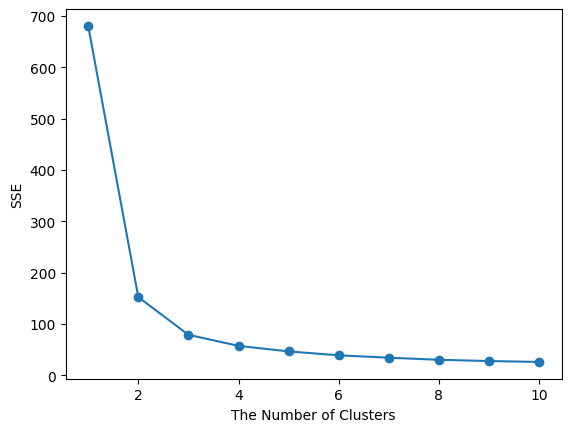

[680.8244, 152.36870647733906, 78.94084142614601, 57.34540931571816, 46.535582051282056, 38.95701115711986, 34.326529914529914, 30.227724598930486, 27.766706937799043, 26.07225182334006]


In [12]:
# 엘보우 방법
import matplotlib.pyplot as plt
def elbow(X):
    sse=[]
    for i in range(1, 11):
        km=KMeans(n_clusters=i, random_state=1)
        km.fit(X)
        sse.append(km.inertia_)
    
    plt.plot(range(1,11), sse, marker='o')
    plt.xlabel('The Number of Clusters')
    plt.ylabel('SSE')
    plt.show()
    print(sse)
elbow(X)

In [13]:
# 최적의 k로  K-Means 군집화 실행
km = KMeans(n_clusters =3, random_state=2023)
km.fit(X)
# 할당된 군집을 iris 데이터에 추가
new_labels = km.labels_
iris['cluster'] = new_labels

iris.groupby(['cluster']).mean()

,sepal length,sepal width,petal length,petal width
cluster,,,,
0,6.850000,3.073684,5.742105,2.071053
1,5.006000,3.418000,1.464000,0.244000
2,5.901613,2.748387,4.393548,1.433871


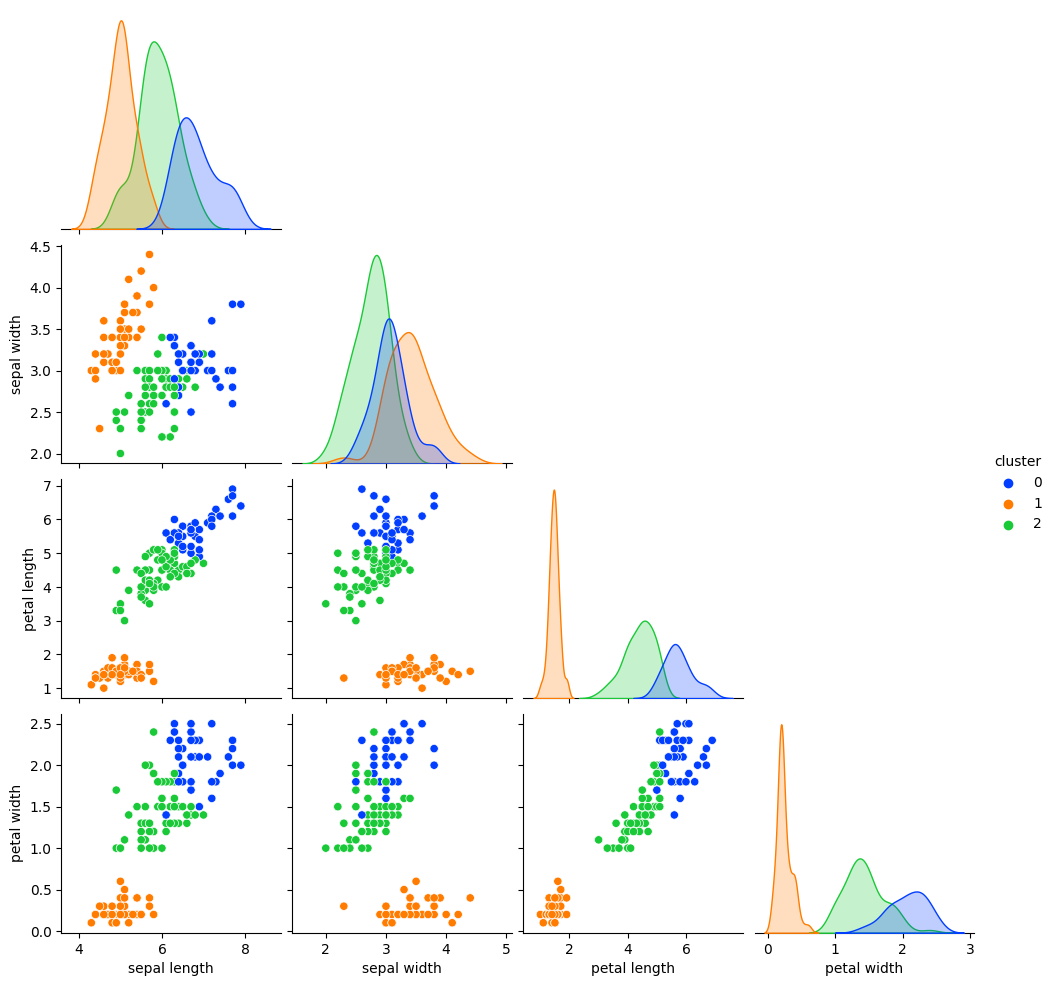

In [14]:
# k-means 시각화 
# 군집결과 시각화
import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(iris,
             diag_kind='kde',
             hue="cluster", 
             corner =True,  
             palette='bright')
plt.show()


In [15]:
## (2) 혼합분포 군집분석
# k개의 각 모형은 군집이며 각 데이터는 추정된 k개의 모형 중 어느 모형으로부터 나왔을 확률이 높은지에 따라 군집의 분류가 만들어진다.
# 이과정에서 공분산 행렬, Likehood의 개념들어간다.
# - 장점 : K-menas 보다 통계적으로 엄밀한 결과를 얻을 수 있다. (확률 분포를 도입)
#  군집을 몇개의 모수로 표현할 수 있고, 서로 다른 크기나 모양의 군집을 찾을 수 있다.
# - 단점 : 군집의 크기가 너무 작으면 추정의 정도가 떨어진다.
#  데이터가 커지면 EM 알고리즘 적용시 시간/계산비용이 증가한다.
#  이상치에 민감하기 때문에 사전에 전처리가 필요하다.
#  유형들의 분포가 정규분포와 차이가 크면 결과가 좋지 못하다.

In [16]:
# 필요한 모듈
import pandas as pd
import numpy as np
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture

In [21]:
# 데이터 Load
iris = pd.read_csv("C:/adp/data/iris.csv")
df = iris.drop('target', axis = 1)

# 데이터 스케일링
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# 가우시안 혼합모델 구출
gmm = GaussianMixture(n_components = 3)
gmm.fit(df_scaled)
gmm_labels = gmm.predict(df_scaled)
gmm_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 1, 2, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [22]:
df["gmm_cluster"] = gmm_labels

# 군집의 변수별 통계량 확인
clusters = [0,1,2]
df.groupby('gmm_cluster').mean()

,sepal length,sepal width,petal length,petal width
gmm_cluster,,,,
0,5.006000,3.418000,1.464000,0.244000
1,6.554545,2.950909,5.489091,1.989091
2,5.904444,2.775556,4.193333,1.293333


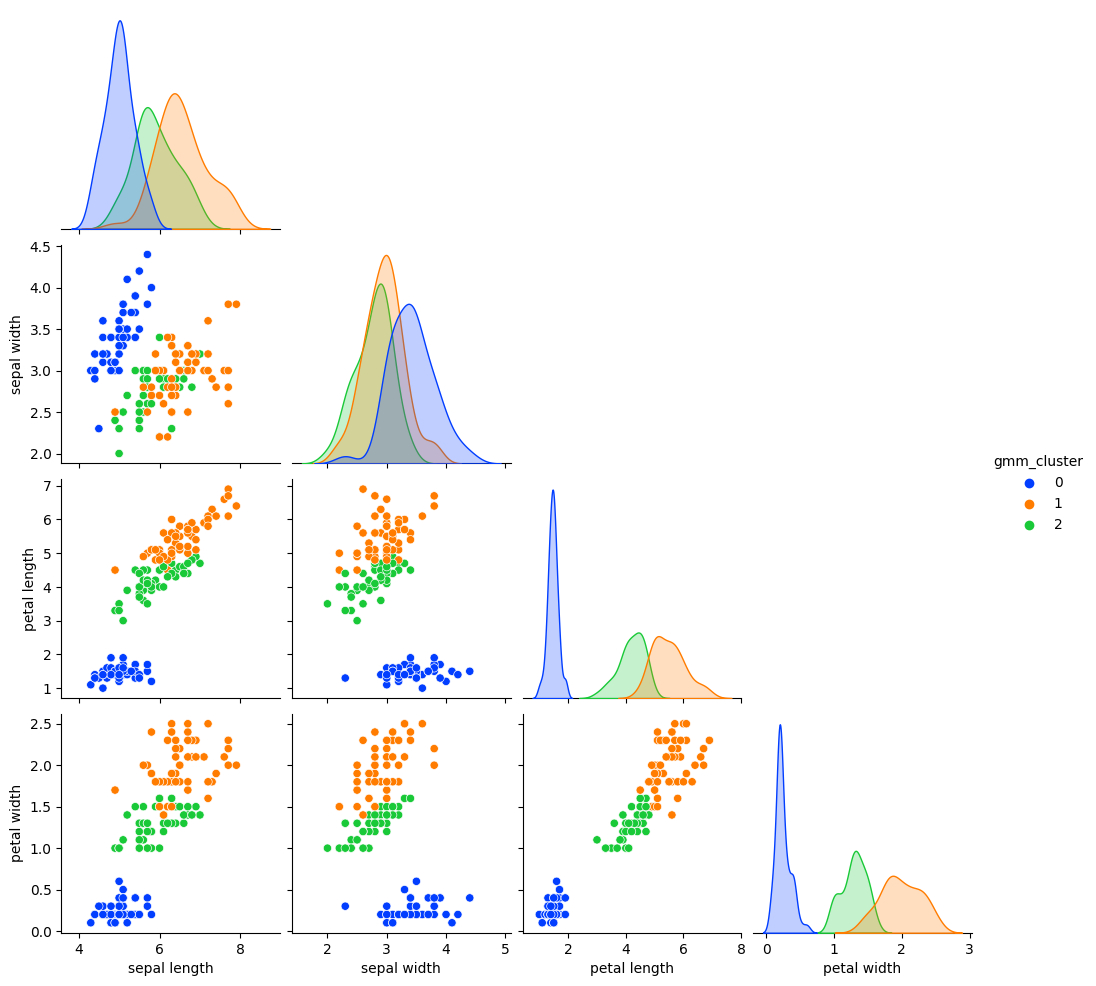

In [23]:
# 군집결과 시각화
import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(df, diag_kind='kde', hue = "gmm_cluster", corner=True, palette='bright')
plt.show()

In [ ]:
# 혼합분포군집결과 iris 데이터가 3개의 그룹으로 잘 나뉨.
# 앞서 K-means에서 0번 군집과 2번 군집에 대해서는 GMM알고리즘이 더 잘 나눈것처럼 확인된다.
# 여기서도 볼수있듯이 K-means는 원형, GMM은 타원 형태의 데이터를 잘 군집화시키는 것으로 확인된다.

# 꽃의 종류는 sepal length, sepal width의 변수보다는 petal width와 petal length로 구별된다고 할 수 있음

In [30]:
# 클러스터별 콜린스키 하라바츠 결과 비교
# 2가 나오네..
from sklearn.metrics import calinski_harabasz_score

for k in range(2, 10):
    gmm = GaussianMixture(n_components=k).fit(df_scaled)
    gmm_labels = gmm.predict(df_scaled)
    print(k, ":", calinski_harabasz_score(X, gmm_labels))

2 : 501.9248640964316
3 : 480.78615380973037
4 : 337.9075665349468
5 : 333.0736204332171
6 : 257.81440156263017
7 : 272.7331608945051
8 : 247.7411717709678
9 : 243.87161758528188
